## Q. 아래의 세기를 가지는 빛이 30 mm 만큼 전파하면 어떤 모양이 될지 예측해보자!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


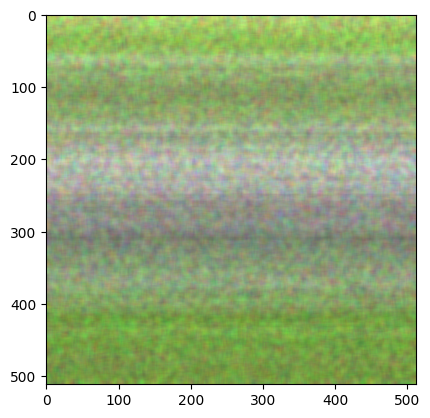

In [13]:
import numpy as np
import matplotlib.pyplot as plt
field = np.load("unknown.npy")
plt.imshow(np.abs(field))

# Light propagation tutorial

### Light propagation

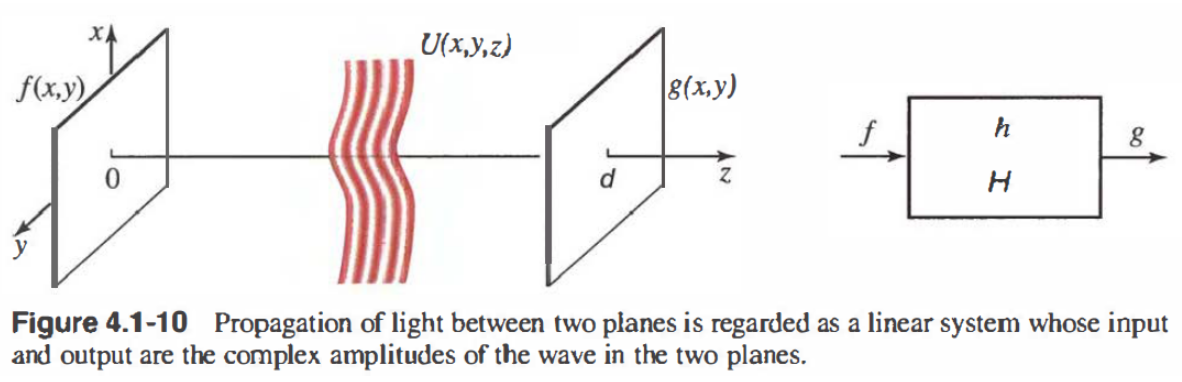

Propagation of light between two planes can be calculated using the following equation.

$$g(x,y)=\int\int_{-\infty}^{\infty}H(\nu_{x},\nu_{y})F(\nu_{x},\nu_{y})\exp[j2\pi(\nu_{x}x+\nu_{y}y)]\,d\nu_{x}d\nu_{y},$$
$$H(\nu_{x},\nu_{y})=\exp\left(-j2\pi d\sqrt{\lambda^{-2}-\nu_{x}^{2}-\nu_{y}^{2}}\right).$$
$$F(\nu_{x},\nu_{y})=\int\int_{-\infty}^{\infty}f(x,y)\exp\left[-j2\pi(\nu_{x}x+\nu_{y}y)\right]d x\,d y$$

* $f(x,y)$: Initial field
* $g(x,y)$: Propagated field
* $H(\nu_{x},\nu_{y})$: Propagation kernel
* $F(\nu_{x},\nu_{y})$: Fourier transformed field
* $\lambda$: Wavelength of light
* $d$: propagation distance

#### exercise
Wave propagation을 numpy를 이용해서 직접 짜보자.\
즉, $f(x,y)$를 이용해 $g(x,y)$를 구하는 함수 `propagate`를 구현해보자.

1. 먼저 해야 할 일은 $f(x,y)$를 이용해 $F(\nu_x,\nu_y)$를 구하는 일이다.\
이전에 만들었던 함수 `fft` 를 이용하면 된다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def fft(field):
    return np.fft.fftshift(np.fft.fft2(field, axes=[0,1]), axes=[0,1])

2. 이제 할 일은 propagation kernel $H(\nu_{x},\nu_{y})$ 을 구하는 일이다.\
`get_propagation_kernel` 함수를 만들어 $H(\nu_{x},\nu_{y})$를 구해보자.
$$H(\nu_{x},\nu_{y})=\exp\left(-j2\pi d\sqrt{\lambda^{-2}-\nu_{x}^{2}-\nu_{y}^{2}}\right).$$

#### 2-1. 이를 구하기 위해서는 $\nu_{x}, \nu_{y}$에 대한 정의가 필요하다.
어떻게 정의할 수 있을까? (힌트: 픽셀 크기가 필요하다, 시간으로 치면 시간간격. 여기에서는 6.3 um 로 하자.)

##### solution

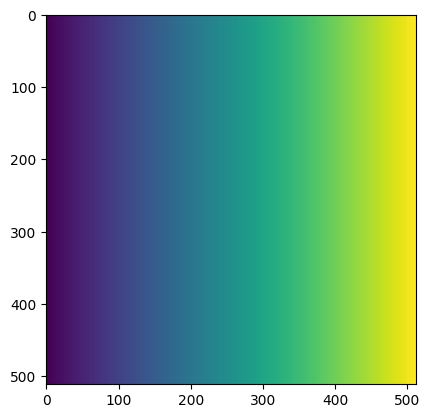

In [15]:
def get_f(shape, dx):
    ff = [np.linspace(-1/dx/2, 1/dx/2-1/dx/s, s) for s in shape[-2:]]
    return np.meshgrid(ff[0], ff[1])[::-1]

dx = 6.3e-6
fy, fx = get_f((512,512), dx)
plt.imshow(fx)
plt.show()

#### 2-2. propagation kernel
이제 이렇게 정의한 $\nu_{x}, \nu_{y}$를 이용해 $H(\nu_{x},\nu_{y})$를 구해보자.

$$H(\nu_{x},\nu_{y})=\exp\left(-j2\pi d\sqrt{\lambda^{-2}-\nu_{x}^{2}-\nu_{y}^{2}}\right).$$

##### solution

In [6]:
def get_propagation_kernel(fx, fy, wl, d):
    return np.exp(-1j*2*np.pi*d*np.sqrt(1/wl**2-fx**2-fy**2))

#### 3. inverse fourier transform
이제 $H(\nu_{x},\nu_{y})$와 $F(\nu_{x},\nu_{y})$가 곱해진 값 $HF$를 \
inverse fourier transform을 수행하는 함수를 만들어 보자.

In [7]:
def ifft(F):
    pass

##### solution

In [8]:
def ifft(F):
    return np.fft.ifft2(np.fft.ifftshift(F, axes=[0,1]), axes=[0,1])

#### 4. Propagation
모든 함수를 종합해 `propagate`를 만들어 보자.\
단 $d$=10mm, $\lambda$=515 nm 로 가정하자.
$$g(x,y)=\int\int_{-\infty}^{\infty}H(\nu_{x},\nu_{y})F(\nu_{x},\nu_{y})\exp[j2\pi(\nu_{x}x+\nu_{y}y)]\,d\nu_{x}d\nu_{y},$$
$$H(\nu_{x},\nu_{y})=\exp\left(-j2\pi d\sqrt{\lambda^{-2}-\nu_{x}^{2}-\nu_{y}^{2}}\right).$$
$$F(\nu_{x},\nu_{y})=\int\int_{-\infty}^{\infty}f(x,y)\exp\left[-j2\pi(\nu_{x}x+\nu_{y}y)\right]d x\,d y$$

In [9]:
def propagate(field, d):
    pass

##### solution

In [10]:
def propagate(field, d):
    H = get_propagation_kernel(fx, fy, wl=515e-9, d=d)
    F = fft(field)
    return ifft(H[...,np.newaxis]*F)

#### 5. Propagation test
`propagate`를 이용해 실제 field가 propagation 시키면 어떻게 되는지 확인해 보자.\
즉, 이전에 읽어들인 이미지를 30mm 전파시켜 보자.\
단, $\lambda$=515 nm로 가정하자.

In [31]:
field = np.load("unknown.npy")

shape = field.shape[:2]
dx = 6.3e-6
fy, fx = get_f(shape, dx)

(512, 512)


##### solution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


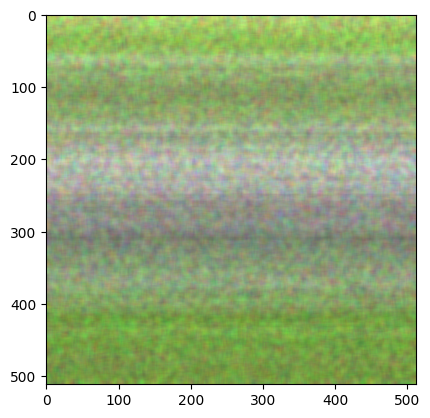

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


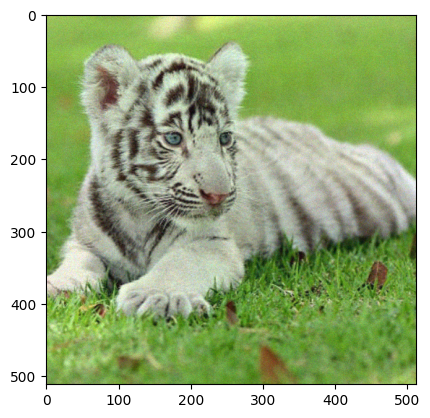

In [30]:
field = np.load("unknown.npy")

shape = field.shape[:2]
dx = 6.3e-6
fy, fx = get_f(shape, dx)

plt.imshow(np.abs(field))
plt.show()
plt.imshow(np.abs(propagate(field, 30e-3)))
plt.show()

#### make animation

```python
import plotly.express as px
imgs = []
for d in np.linspace(0, 30e-3, 11):
    imgs.append(np.abs(propagate(field, d)))

fig = px.imshow(np.array(imgs), animation_frame=0, zmin=0, zmax=1, width=600, height=600)
# fig.write_html("/home/sheepvs5/Jupyter/img/white_baby_tiger_hologram.html")
```

#### ex
레이저는 일반적으로 가우시안 모양이다.
$$ f(x,y) = e^{-\frac{x^2+y^2}{\sigma^2}} $$
$\sigma$ = 0.1 mm 인 레이저가 10 mm 전파하면 어떤 모양이 되는지 확인해 보자.\
5 mm, 20 mm 에 대해서도 확인해 보자.

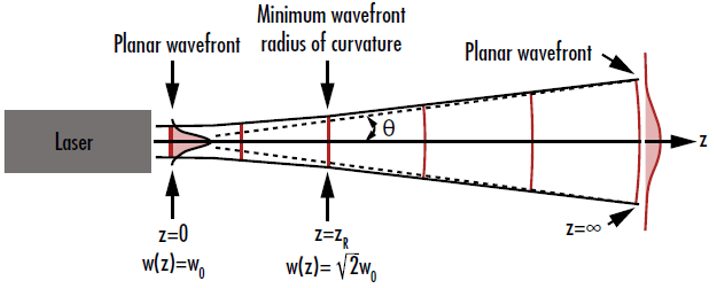